In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import fbprophet
sns.set()

# Importing Data

- The goal here is to predict the number of site visits on Oct-15-2016
- I opted to use a decomposable model developed by facebook which is accurate and intuitive. Facebook tends to use the same type of data that we are working with so I felt this would be the best option. 


In [2]:
df = pd.read_excel('../data/Analysis test.xlsx')

In [3]:
df = df.drop(['Unnamed: 3','Unnamed: 4','Unnamed: 5'],axis=1)

In [4]:
m = fbprophet.Prophet(daily_seasonality=True,)


In [5]:
frame = df.copy()

In [6]:
frame.head()

,Date,Site Visits,Searches
0,2016-08-01,36468,1276
1,2016-08-02,34307,1232
2,2016-08-03,33930,1298
3,2016-08-04,31783,1188
4,2016-08-05,27253,1056


# Fitting and making predicitons
- After fitting and interpreting the model my analysis shows that on October-15-2016 we can expect around 18-20k visits to our site.

In [120]:
frame = frame.rename(columns={'Date':'ds','Site Visits':'y'})
frame = frame.drop('Searches',axis=1)

In [121]:
m.fit(frame);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [122]:
future = m.make_future_dataframe(periods=1)


In [123]:
forecast = m.predict(future)


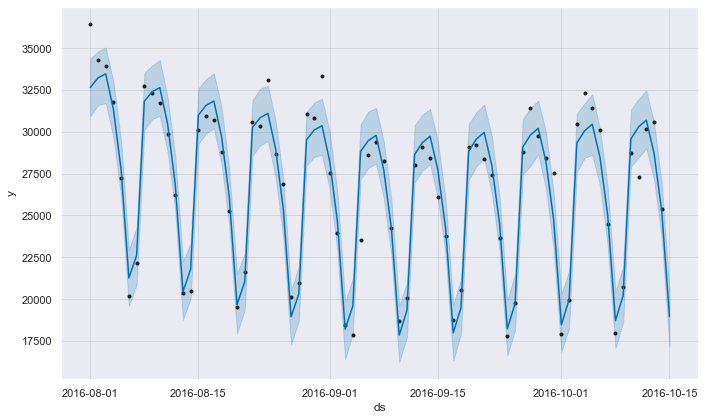

In [124]:
m.plot(forecast);


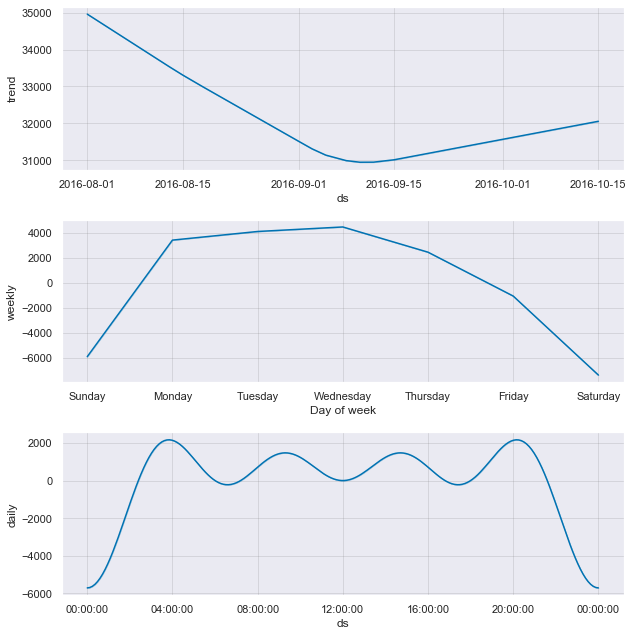

In [125]:
m.plot_components(forecast);



In [128]:
forecast.tail(1).T

,75
ds,2016-10-15 00:00:00
trend,32057
yhat_lower,17162.1
yhat_upper,20484.7
trend_lower,32056.6
trend_upper,32057.5
additive_terms,-13107.3
additive_terms_lower,-13107.3
additive_terms_upper,-13107.3
daily,-5711.43


## We see some correlation between the number of searches and the number of visitors to our site

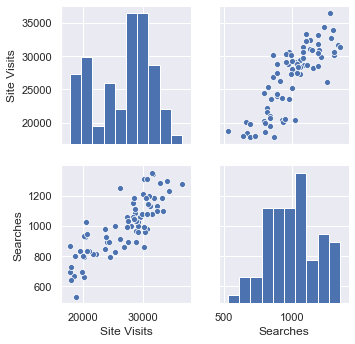

In [167]:
sns.pairplot(df)
